In [12]:
import pandas as pd

df = pd.read_csv("data_throughput.csv")

df

,Unnamed: 0,160,320,640,1280
0,yolo8n,454.2,326.4,145.6,42.4
1,yolo9n,431.8,309.8,140.6,41.6
2,yolo10n,447.6,333.4,160.8,45.6
3,yolo11n,467.8,346.6,163.4,47.4
4,yolo8s,348.2,183.8,59.2,15.8
5,yolo9s,334.4,182.2,60.2,16.0
6,yolo10s,362.4,204.4,70.6,18.2
7,yolo11s,363.0,208.2,70.8,18.2
8,yolo8m,219.2,88.4,24.4,6.6
9,yolo9m,217.4,85.4,23.8,6.0


In [13]:
df["model_name"] = df["Unnamed: 0"]

In [14]:
df["yolo_version"] = df["model_name"].str.extract(r'(\d+)').astype(int)
df["model_size"] = df["model_name"].str[-1]

In [15]:
df

,Unnamed: 0,160,320,640,1280,model_name,yolo_version,model_size
0,yolo8n,454.2,326.4,145.6,42.4,yolo8n,8,n
1,yolo9n,431.8,309.8,140.6,41.6,yolo9n,9,n
2,yolo10n,447.6,333.4,160.8,45.6,yolo10n,10,n
3,yolo11n,467.8,346.6,163.4,47.4,yolo11n,11,n
4,yolo8s,348.2,183.8,59.2,15.8,yolo8s,8,s
5,yolo9s,334.4,182.2,60.2,16.0,yolo9s,9,s
6,yolo10s,362.4,204.4,70.6,18.2,yolo10s,10,s
7,yolo11s,363.0,208.2,70.8,18.2,yolo11s,11,s
8,yolo8m,219.2,88.4,24.4,6.6,yolo8m,8,m
9,yolo9m,217.4,85.4,23.8,6.0,yolo9m,9,m


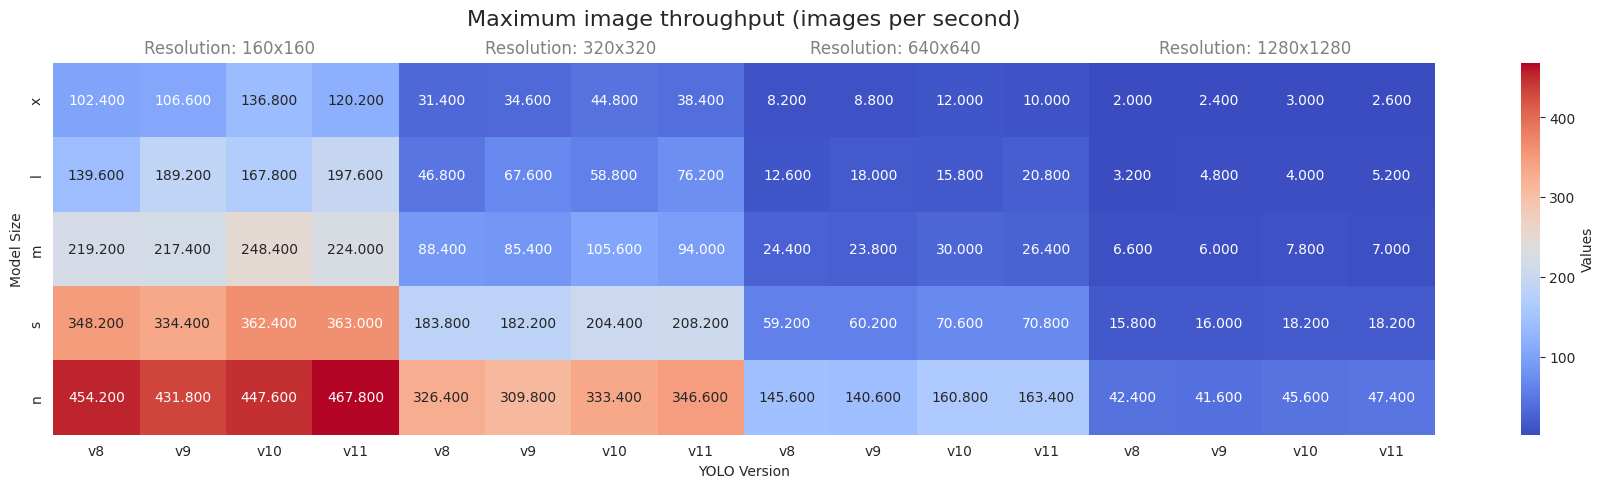

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data_throughput.csv")
df["model_name"] = df["Unnamed: 0"]
df["yolo_version"] = df["model_name"].str.extract(r'(\d+)').astype(int)
df["model_size"] = df["model_name"].str[-1]

# Melt the dataframe
df_melted = df.melt(id_vars=["model_size", "yolo_version"], value_vars=["160", "320", "640", "1280"], 
                    var_name="resolution", value_name="value")

# Create a new column combining resolution and yolo_version
df_melted['res_yolo'] = df_melted['resolution'] + '-' + df_melted['yolo_version'].astype(str)

# Pivot the dataframe for heatmap
heatmap_data = df_melted.pivot_table(index='model_size', columns='res_yolo', values='value')

# Sort columns first by resolution then by yolo_version
sorted_cols = sorted(heatmap_data.columns, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
heatmap_data = heatmap_data[sorted_cols]

# Sort the model sizes
model_size_order = ["n", "s", "m", "l", "x"]
model_size_order.reverse()
heatmap_data = heatmap_data.loc[model_size_order]

# Plot the heatmap using seaborn
plt.figure(figsize=(18, 5))  # Adjusted figure size
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Values'})

main_title = f"Maximum image throughput (images per second)"
plt.title(main_title, fontsize=16)
plt.title(main_title, fontsize=16, y=1.08)  # Adjust the `y` parameter here

# Adding subtitles at specific x-coordinates below the main title
title_x_coords = [0.13, 0.32, 0.5, 0.7]
subtitles = ["Resolution: 160x160", "Resolution: 320x320", "Resolution: 640x640", "Resolution: 1280x1280"]

for x, subtitle in zip(title_x_coords, subtitles):
    plt.figtext(x, 0.88, subtitle, ha="center", fontsize=12, color='grey')

# Modify x-labels to add prefix "v"
new_labels = ['v' + lbl.get_text().split('-')[-1] for lbl in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(new_labels)
plt.xlabel("YOLO Version")
plt.ylabel("Model Size")
plt.tight_layout()
plt.savefig("yolo_throughput_table.png")
plt.show()